### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Final Project Report

## Project Title: Gun Violence in the United States

## Student(s): Eugene Yakovlev and Rachel Fisher

#### Date: 6-5-2018
---

#### Abstract
---

Our final project aims to explore and study gun violence in the United States. We explored the top states and cities with gun incidents, as well as how these incidents have changed each month and year. Our data set is from Kaggle and can be accessed from this link:

https://www.kaggle.com/jameslko/gun-violence-data/data

Some final findings include the city with the most gun incidents (Chicago, Illinois) as well as how many guns are usually used per incident, which was only one gun per incident.

### 1. Introduction
---

Our final project aims to explore and study gun violence in the United States. Currently, there is a lack of large and easily accessible data on gun violence. The original dataset was originally downloaded from gunviolencearchive.org using web scraping techniques by James Ko. The dataset contains data for all recorded gun violence incidents in the US between January 2013 and March 2018. A few of the areas that we are interested in exploring, but not limited to, are:
- Most popular guns used in the incidents
- Number of guns typically used in an incident
- Top 10 States with the most reported incidents
- See how the number of injuries and kills have changed over the years
- Classify the killers by gender
- Explore how the amount of incidents change by year, quarter, and month

This analysis can help us understand which states can be regarded as the more ‘dangerous’ ones and which states can be regarded as the ‘safer’ ones to live in. You can also see which guns that the killers used and use that as a predictive model moving forward. 


### 2. Problem Definition
---

The big problem we are looking into is trying to stop gun violence in the US. One way to do this is to look at the data of previous gun violence incidents and see what information we can take away from it. If we can get enough information that allows us to predict why these incidents occur, we can take preemptive measures to lower the amount of incidents that happen.

With this specific dataset, we can see if there is a correlation between specific guns or locations and many gun violence incidents. If there is a correlation with a specific gun, it might be because the gun is too easily accessible and should require more intensive background checks before being purchasable. While looking at this dataset, we will focus on the current situation in America, and see if there are any trends that we can find to help us predict any gun violence incidents in the future.

Anyone living in the United States could benefit from the solutions presented in this project, as the solutions might provide cautionary information. The solutions could also provide information that citizens could use to make an informed decision when it comes to voting on gun related laws.


### 3. Data Sources
---

The gun violence data comes in a CSV file that was downloaded from Kaggle.com. The original author, James Ko, originally downloaded the dataset from gunviolencearchieve.org. Because the original source (GVA) limits the amount of incidents it returns from a single query, the detailed data had to be obtained through web scraping techniques. A python script was used to scrap the data from 1/1/2013 to 3/31/18 and then write it to a CSV file. It’s important to note that there were not many incidents recorded in 2013. The final entries were sorted by the date of the incident and merged into a single CSV file. 


### 4. Acquiring and Loading Data
---

In [22]:
# Import Pandas package
import pandas as pd
# Read gun-violence-data.csv as a pandas DataFrame, Read the 'date' column as a datetime object
df = pd.read_csv("gun-violence-data.csv", parse_dates=["date"])

### 5. Exploring and Visualizing Data
---

In [23]:
# Shape of the DataFrame
df.shape

(239677, 29)

In [24]:
# Overview of the DataFrame columns and content
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [25]:
# Concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null datetime64[ns]
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude            

In [26]:
# Generate various summary statistics, excluding NaN values
df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [27]:
# Count the amount of missing values in each column
missing_count = df.isnull().sum().sort_values(ascending = False)
# Compute the missing value percentage in each column
missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
# Combine the Missing Count & Percent into one DataFrame
missing_gun_data  = pd.concat([missing_count, missing_percent], axis=1, keys=['Missing Count', 'Missing Percent'])

# Display the missing data stats
missing_gun_data

,Missing Count,Missing Percent
participant_relationship,223903,93.418643
location_description,197588,82.439283
participant_name,122253,51.007397
gun_stolen,99498,41.513370
gun_type,99451,41.493760
n_guns_involved,99451,41.493760
participant_age,92298,38.509327
notes,81017,33.802576
participant_age_group,42119,17.573234
state_house_district,38772,16.176771


We decided to drop any data column that had more than 15% missing data, as we felt that wouldn't be useful information.

### 6. Wrangling and Cleansing Data
---

In [28]:
# Drop irrelevant columns in the DataFrame that we don't find useful
df.drop(columns = ['incident_url','source_url', 'incident_url_fields_missing', 'notes', 'participant_relationship', 
                  'location_description', 'participant_name', 'participant_age', 'address', 'sources', 'incident_characteristics']
        , inplace = True)

In [29]:
# Create new columns in the DataFrame with the extracted month and year values
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [30]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,month,year
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,40.3467,-79.8559,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1,2013
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,33.9090,-118.3330,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1,2013
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,41.4455,-82.1377,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,2013
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,39.6518,-104.8020,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,1,2013
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,36.1140,-79.9569,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,1,2013


### 7. Analyzing Data
---

[Text(0,0.5,'Number of Incidents'), Text(0.5,0,'State')]

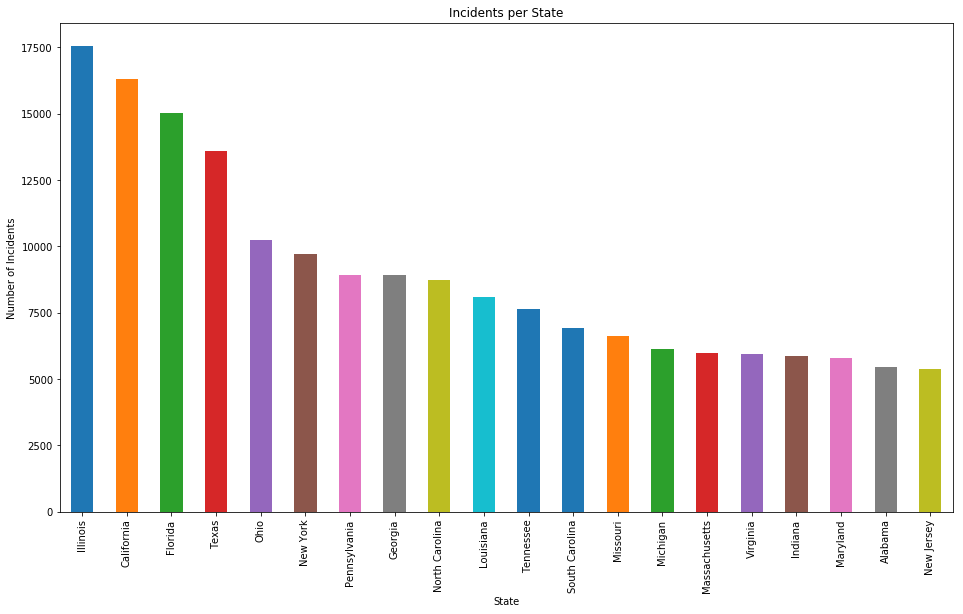

In [31]:
# Plot the top 20 states with gun violence incidents
top_states = df['state'].value_counts()[0:20].plot.bar(figsize = (16,9), title = "Incidents per State")
top_states.set(xlabel = "State", ylabel = "Number of Incidents")

[Text(0,0.5,'Number of Incidents'), Text(0.5,0,'City')]

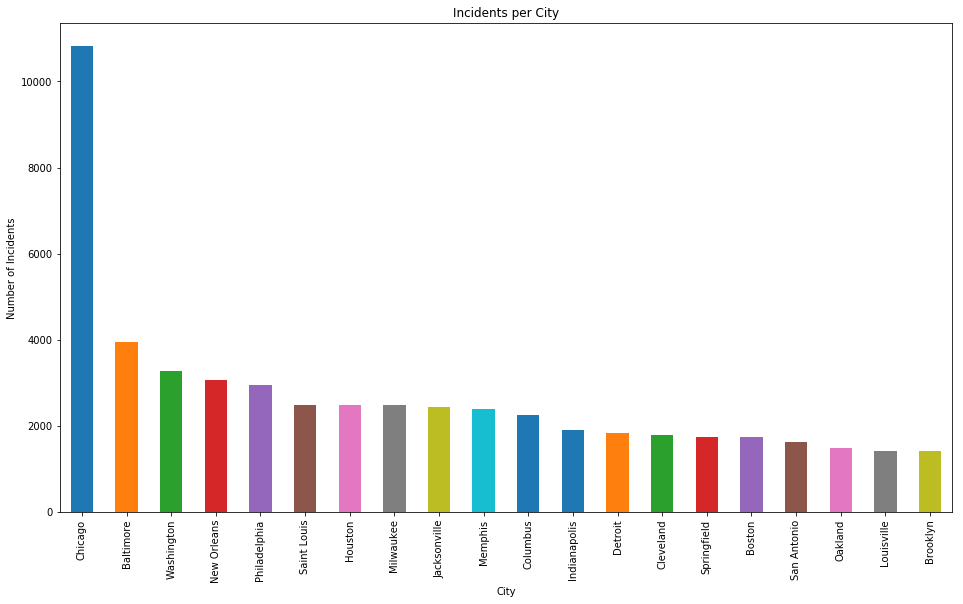

In [32]:
# Plot the top 20 cities with gun violence incidents
top_cities = df['city_or_county'].value_counts()[0:20].plot.bar(figsize = (16,9), title = "Incidents per City")
top_cities.set(xlabel = "City", ylabel = "Number of Incidents")

[Text(0,0.5,'Number of Incidents'), Text(0.5,0,'Year')]

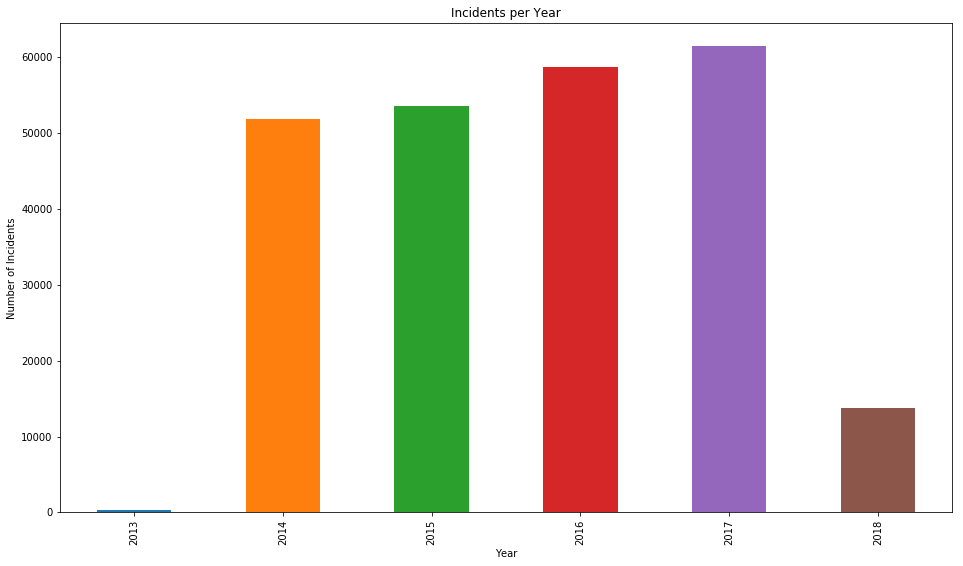

In [33]:
# Plot the count of gun violence incidents per year
years = df['year'].value_counts().sort_index().plot.bar(figsize = (16,9), title = "Incidents per Year")
years.set(xlabel = "Year", ylabel = "Number of Incidents")

[Text(0,0.5,'Number of Incidents'), Text(0.5,0,'Month')]

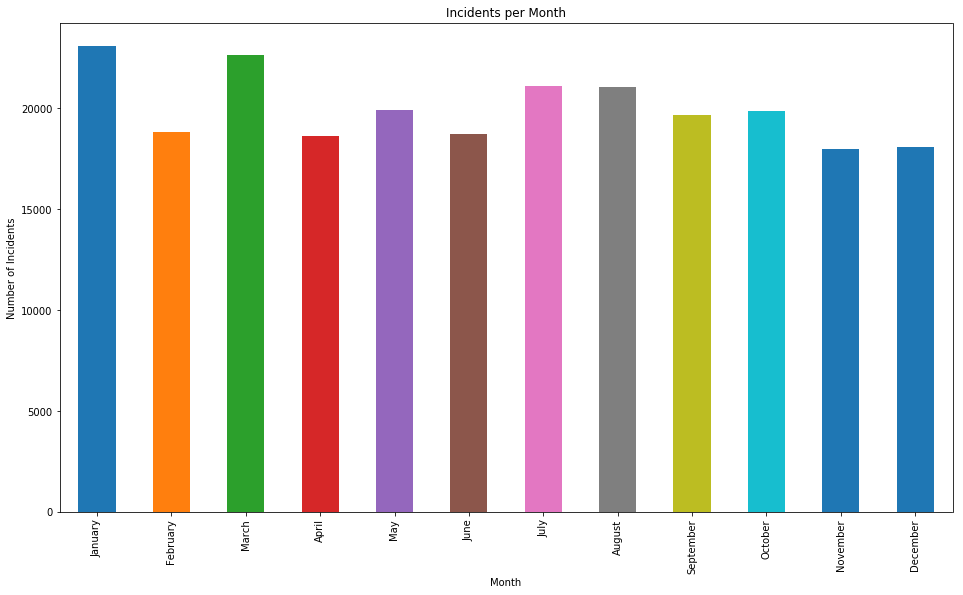

In [34]:
# Map the month column from monthly ints (1-12) to monthly strings (January-December)
df['month'] = df['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                              8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Set the order of months in the month column / To plot months in this order
df['month'] = pd.Categorical(df['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                              'August', 'September', 'October', 'November', 'December'], ordered = True)

# Plot the count of gun violence incidents per month
months = df['month'].value_counts().sort_index().plot.bar(figsize = (16,9), title = "Incidents per Month")
months.set(xlabel = "Month", ylabel = "Number of Incidents")

In [96]:
df['n_guns_involved'].unique()

array([ nan,   2.,   1.,   4.,   3.,   6.,  25.,  30.,   7.,  46., 151.,
        13.,  32.,  22.,  12.,  21.,   5.,  15.,   8.,  17.,  29.,  47.,
        42.,  73.,  50.,  39., 138., 280.,   9.,  20.,  36.,  10.,  34.,
        18.,  44.,  52.,  16.,  14.,  23.,  27.,  38.,  28.,  84.,  19.,
        82.,  11., 100.,  26.,  91.,  45., 111.,  53.,  24., 400., 346.,
       152.,  41., 103.,  48.,  55., 107.,  35.,  49., 170., 338., 183.,
        70.,  62.,  76.,  98.,  81.,  33., 374., 158., 189.,  85.,  40.,
        43.,  96.,  68., 300.,  97., 112.,  60.,  89., 323.,  90., 145.,
       114., 225., 130., 399., 115.,  83.,  59., 268.,  72.,  37.,  80.,
       191.,  66.,  31.,  99.,  67., 200., 276., 127.])

In [92]:
# Create a series with the n_guns_involved / If more than 5 guns are used, replace it with "5+"
n_guns_involved = df['n_guns_involved'].dropna().apply(lambda x : "5+" if x > 5 else str(x)).value_counts()

[Text(0,0.5,''), Text(0.5,0,'')]

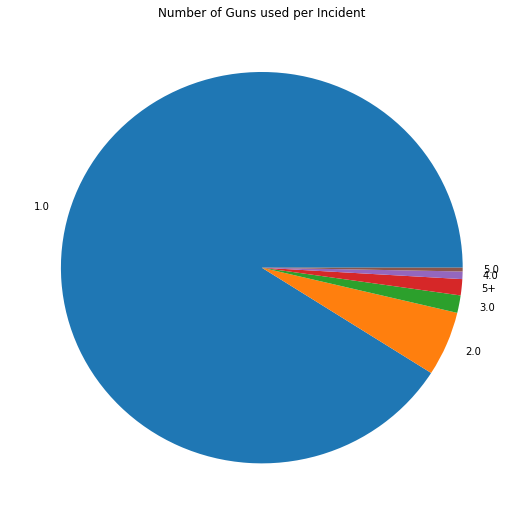

In [93]:
# Plot the number of guns used per incident
guns = n_guns_involved.plot.pie(figsize = (9,9), title = "Number of Guns used per Incident")
guns.set(xlabel = "", ylabel = "")

In [65]:
#Creating data frames that include the number of deaths, injuries, and totals for each year, month, and state

year_injured = df[['year','n_injured']].groupby(['year']).sum()
year_killed = df[['year','n_killed']].groupby(['year']).sum()
year_people = pd.concat([year_injured, year_killed], axis=1)
year_people['n_people'] = year_people['n_injured'] + year_people['n_killed']

month_injured = df[['month','n_injured']].groupby(['month']).sum()
month_killed = df[['month','n_killed']].groupby(['month']).sum()
month_people = pd.concat([month_injured, month_killed], axis=1)
month_people['n_people'] = month_people['n_injured'] + month_people['n_killed']

state_injured = df[['state','n_injured']].groupby(['state']).sum()
state_killed = df[['state','n_killed']].groupby(['state']).sum()
state_people = pd.concat([state_injured, state_killed], axis=1)
state_people['n_people'] = state_people['n_injured'] + state_people['n_killed']

In [52]:
year_people

,n_injured,n_killed,n_people
year,,,
2013,979,317,1296
2014,23002,12557,35559
2015,26967,13484,40451
2016,30580,15066,45646
2017,30703,15511,46214
2018,6171,3533,9704


[Text(0,0.5,'People'), Text(0.5,0,'Year')]

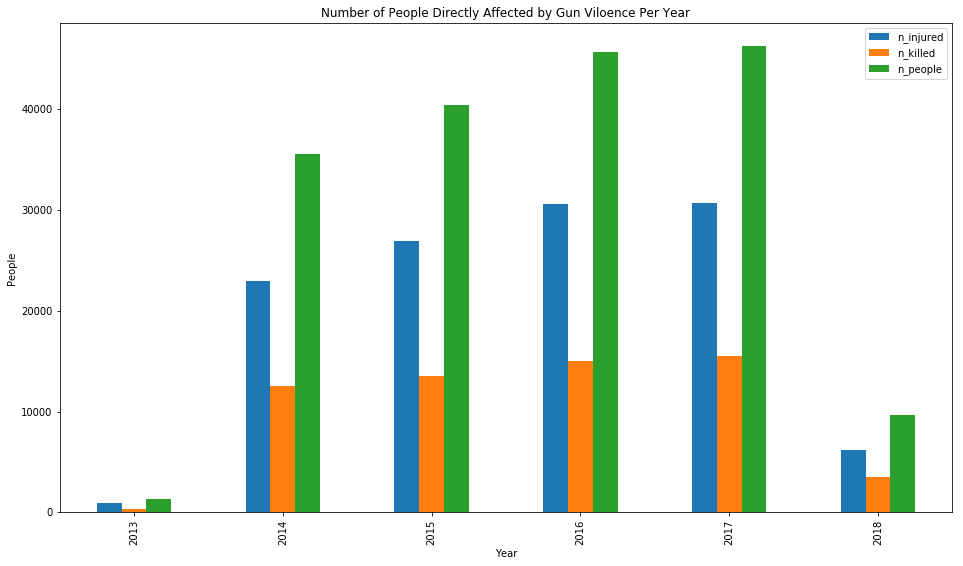

In [48]:
year_people_plot = year_people.plot.bar(figsize = (16,9), title = "Number of People Directly Affected by Gun Viloence Per Year")
year_people_plot.set(ylabel = "People", xlabel = "Year")

While the years 2013 and 2018 are inconclusive, as 2013 had minimal data and 2018 hasn't finished yet, we can say that we see an increase in the number of people killed and injured in gun related incidents for each year. We also noticed that the increase in total deaths and injuries between 2016 and 2017 was a much smaller increase than any years prior, so maybe we are approaching an upperlimit on these deaths and injuries.

In [53]:
month_people

,n_injured,n_killed,n_people
month,,,
January,10946,6035,16981
February,8420,4945,13365
March,10475,5641,16116
April,8907,4383,13290
May,10244,4830,15074
June,9797,4886,14683
July,11259,5276,16535
August,10809,5127,15936
September,9766,4779,14545


[Text(0,0.5,'People'), Text(0.5,0,'Month')]

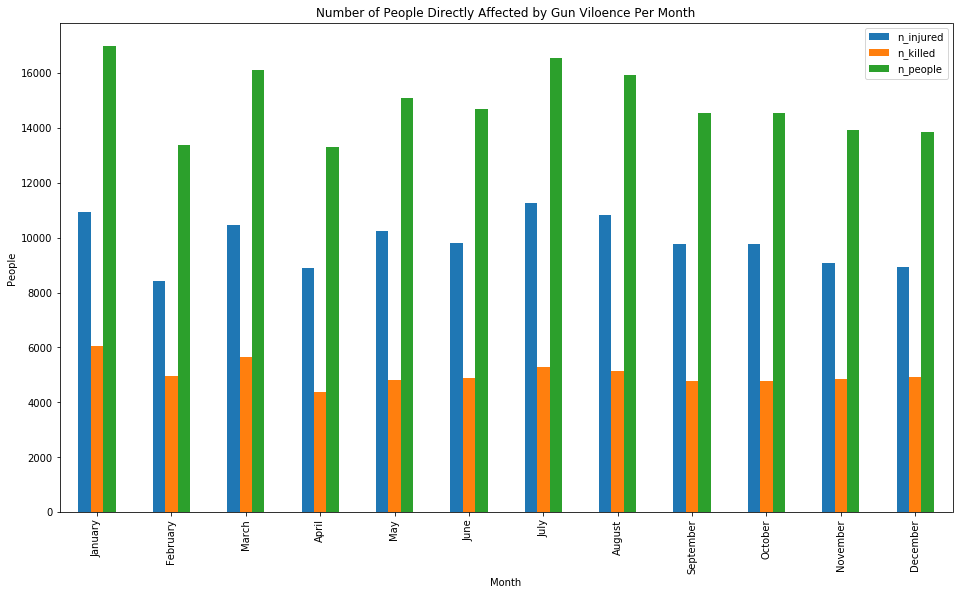

In [54]:
month_people_plot = month_people.plot.bar(figsize = (16,9), title = "Number of People Directly Affected by Gun Viloence Per Month")
month_people_plot.set(ylabel = "People", xlabel = "Month")

Overall, April has the least amount of total people injured and killed in a month at 13,290, but February actually has the least amount of injuries in a month, at 8,420.

In [56]:
state_people

,n_injured,n_killed,n_people
state,,,
Alabama,2998,1880,4878
Alaska,325,267,592
Arizona,1096,1094,2190
Arkansas,1347,773,2120
California,7644,5562,13206
Colorado,1133,796,1929
Connecticut,1258,341,1599
Delaware,853,217,1070
District of Columbia,1415,459,1874


[Text(0,0.5,'People'), Text(0.5,0,'State')]

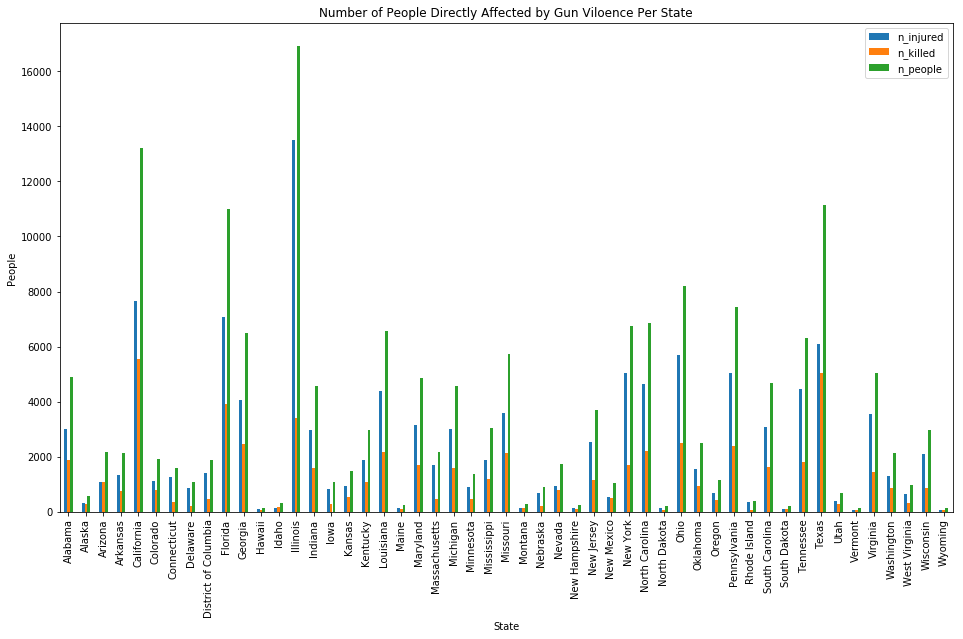

In [57]:
state_people_plot = state_people.plot.bar(figsize = (16,9), title = "Number of People Directly Affected by Gun Viloence Per State")
state_people_plot.set(ylabel = "People", xlabel = "State")

By this graph we can definitively see that Illinois has the highest total of deaths and injuries because of gun related incidents, but that is because it has the highest amount of injuries for a state, sitting at 13,514. The state with the most deaths is actually California, with 5,562 deaths between 2013 and 2018. The "safest" state is Wyoming, with only 125 total people killed or injured.

### 8. Reporting Results
---

Shown below are the top 20 states with gun incidents, which we calculated by counting the nubmer of times each state appeared in the data file. As you can see, the top 4 states with gun incidents are Illinois, California, Florida, and Texas. This could be an indicator that in these specific states there should be some sort of increase in gun regulation, as they all have over 3,000 more incidents than the 5th highest state, Ohio.

[Text(0,0.5,'Number of Incidents'), Text(0.5,0,'State')]

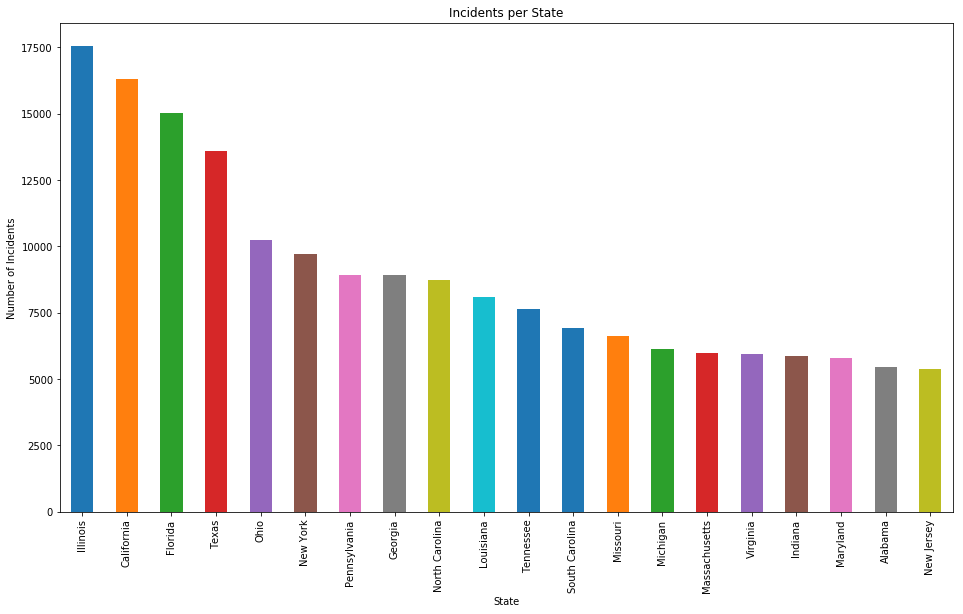

In [81]:
# Plot the top 20 states with gun violence incidents
top_states = df['state'].value_counts()[0:20].plot.bar(figsize = (16,9), title = "Incidents per State")
top_states.set(xlabel = "State", ylabel = "Number of Incidents")

In a similar fashion, we plotted the top 20 cities with gun incidents, and it is clear to see that Chicago has by far the most incidents with over 10,000 between the years 2013 and 2018. The second highest city is Baltimore, coming in just under 4,000 incidents over those same years. This means that Chicago has had more than double the incidents than the second highest city in America.

[Text(0,0.5,'Number of Incidents'), Text(0.5,0,'City')]

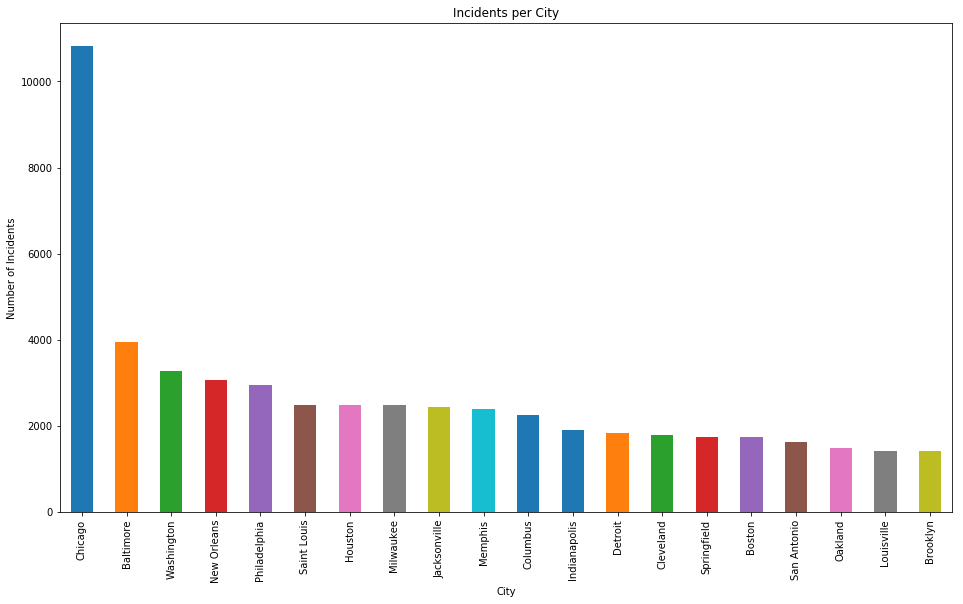

In [82]:
# Plot the top 20 cities with gun violence incidents
top_cities = df['city_or_county'].value_counts()[0:20].plot.bar(figsize = (16,9), title = "Incidents per City")
top_cities.set(xlabel = "City", ylabel = "Number of Incidents")

Both of the graphs above show us that Illinois, but more specifically Chicago, can be described as the area in America with the most gun violence. Hopefully these graphs can help people by either helping them decide where or where not to move, but also help people realise that certain states and cities desperately need some change when it comes to gun laws.

The graph below shows the number of people directly killed or injured because of gun incidents.

While the years 2013 and 2018 are inconclusive, as 2013 had minimal data and 2018 hasn't finished yet, we can say that we see an increase in the number of people killed and injured in gun related incidents for each year.

We also noticed that the increase in total deaths and injuries between 2016 and 2017 was a much smaller increase than any years prior, so maybe we are approaching an upperlimit on these deaths and injuries.

[Text(0,0.5,'People'), Text(0.5,0,'Year')]

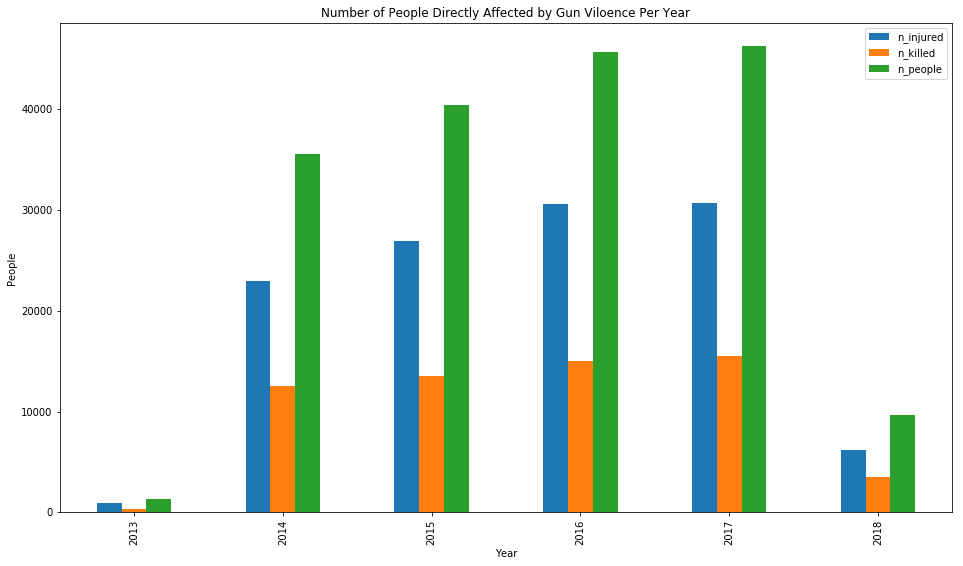

In [87]:
year_people_plot = year_people.plot.bar(figsize = (16,9), title = "Number of People Directly Affected by Gun Viloence Per Year")
year_people_plot.set(ylabel = "People", xlabel = "Year")

We also compared the months to see which had the most deaths and injuries, but overall, most months don't differ too greatly from one another.

The best information that we can get from the graph below is that April has the least amount of total people injured and killed in a month at 13,290, but February actually has the least amount of injuries in a month, at 8,420.

[Text(0,0.5,'People'), Text(0.5,0,'Month')]

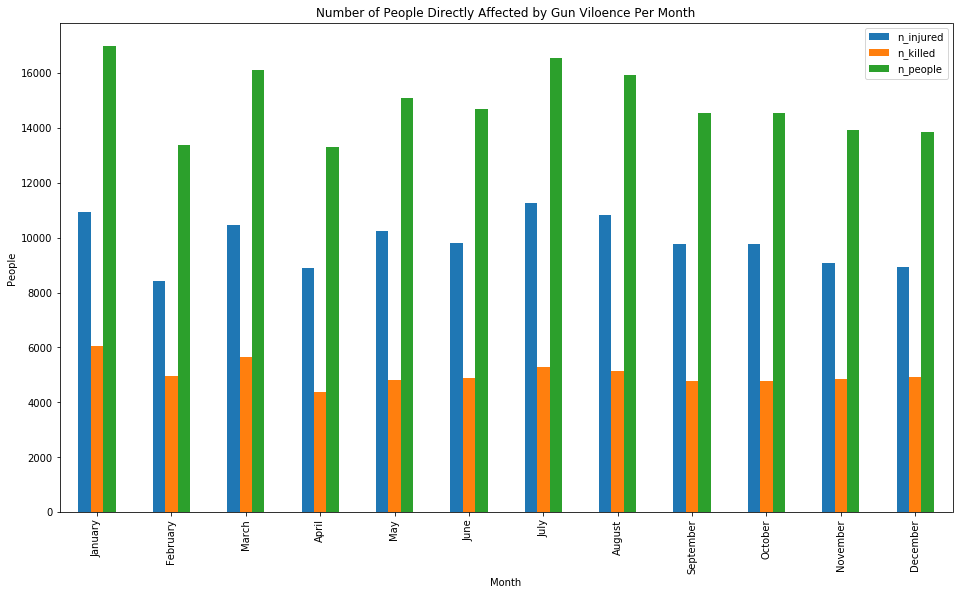

In [88]:
month_people_plot = month_people.plot.bar(figsize = (16,9), title = "Number of People Directly Affected by Gun Viloence Per Month")
month_people_plot.set(ylabel = "People", xlabel = "Month")

We also wanted to compare all of the states to one another and see how they line up. Unsurprisingly, Illinois has the highest total of deaths and injuries because of gun related incidents. But that is because it has the highest amount of injuries for a state, sitting at 13,514. The state with the most deaths is actually California, with 5,562 deaths between 2013 and 2018.

The "safest" state is Wyoming, with only 125 total people killed or injured because of gun violence.

[Text(0,0.5,'People'), Text(0.5,0,'State')]

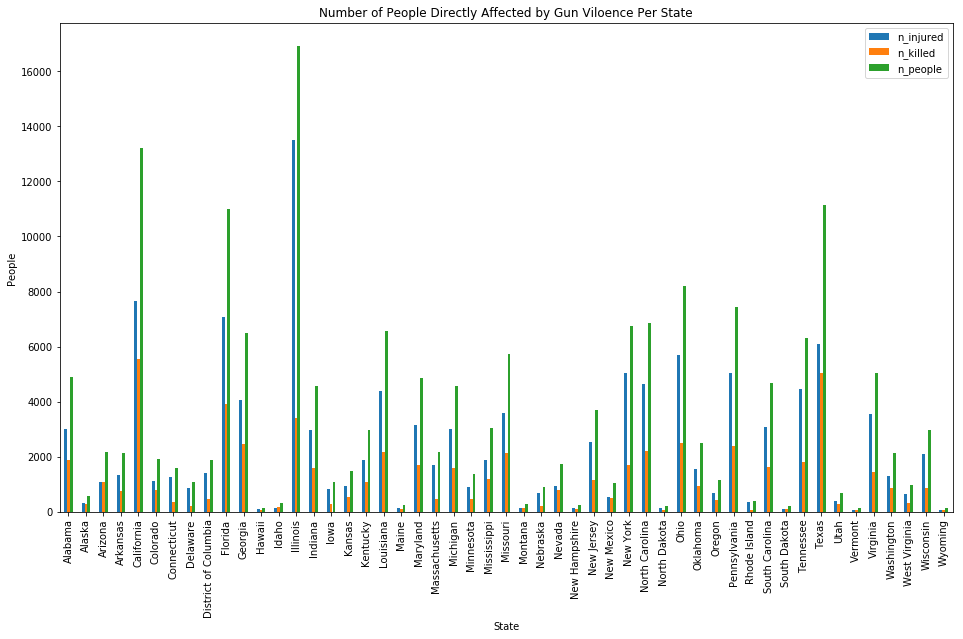

In [89]:
state_people_plot = state_people.plot.bar(figsize = (16,9), title = "Number of People Directly Affected by Gun Viloence Per State")
state_people_plot.set(ylabel = "People", xlabel = "State")

The graph below shows the number of guns used in each incident, and shows us how many guns are used the most. And as clearly shown in the graph, most gun incidents only involved one gun.

Though when exploring the data, we did find that some incidents included hundreds of guns, the highest amount for one incident being 400 guns. But these incidents were few and far between, so we decided to group all of those extraneous incidents in to just one category, "5+".

[Text(0,0.5,''), Text(0.5,0,'')]

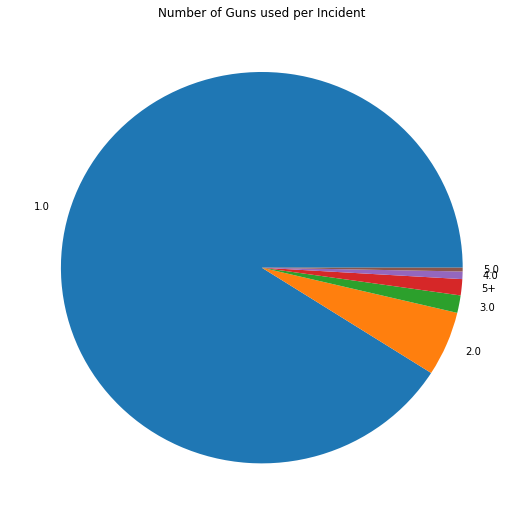

In [84]:
# Create a series with the n_guns_involved / If more than 5 guns are used, replace it with "5+"
n_guns_involved = df['n_guns_involved'].dropna().apply(lambda x : "5+" if x > 5 else str(x)).value_counts()
 
# Plot the number of guns used per incident
guns = n_guns_involved.plot.pie(figsize = (9,9), title = "Number of Guns used per Incident")
guns.set(xlabel = "", ylabel = "")

### 9. Conclusion
---

In conclusion, we found that the city and state experiencing the most gun violence is Chicago, Illinois. We also found that the number of gun incidents has been increasing over the past few years, but could be potentially slowing down. And finally we also found that most gun incidents only involve one gun.

We hope that with this information, the people of America can be more informed and make informed decisions, whether they are deciding where they want to live or how they should vote in upcoming elections.

One of the shortcomings of our findings is the data set itself, as we have very little information for 2013 (as not much was recorded) as well as for 2018 (since the year is still not over). I think if the data set had more information from previous years or if we were working on this project at the end of 2018, we might be able to get an even better look at what is happening with gun violence in America, both past and future trends.

Another shortcoming is that we wanted to look at what types of guns were used in each incident, as well as which gun was the most popular, but that ended up being more than we could handle. The data set in that regard is a little messy and is missing quite a lot of data, especially when it comes to the gun type. So if given more time and guidance, that would've been something we would've liked to explore more.

Some future work that we would like to look at is the number of people involved in each incident as well as their genders, to see if that information can add anything to what we've already found. There's also a column about the participants in each incident describing whether they were a victim or the suspect/perpetrator, and that information could also be really interesting to dive into to see what the average number of vicitms and perpetrators are per incident.

Some lessons we learned from this project include how to work well as a team for a coding project. We ended up basically splitting the work in half, with Eugene doing the first half and me, Rachel, doing the second half. I think that made it easier for us, as we could both do what we wanted with the data set without getting in each others way. Plus we were then both able to use the same "cleaned" version of the data set, so we would get the same results.

We also learned more about cleansing data, and how we had to make the decision on what data was valuable and what wasn't. Above we mentioned how we had to cut off any columns that had more than 15% of it's data missing, and for us that seems like a reasonable number, but obviously that can change depending on the person.

Hopefully our project is interesting to those who look at it, and hopefully it could help some people when making decisions relating to gun violence.

Thank you for reading,

Rachel and Eugene

### 10. References

https://www.kaggle.com/jameslko/gun-violence-data/data